In [2]:
import astropy.units as u
from specutils import Spectrum1D
from astrodb_utils.spectra import check_spectrum_plottable
import os
import numpy as np

INFO     - astrodb_utils.publications - logger.parent.name: astrodb_utils, logger.parent.level: 20


In [3]:
files = ["/Users/guanying/SIMPLE_Archive/SIMPLE-db/scripts/spectra_convert/BONES Archive/BONES SPECTRA/BCSpec_1227m0447.txt",
         "/Users/guanying/SIMPLE_Archive/SIMPLE-db/scripts/spectra_convert/BONES Archive/BONES SPECTRA/BCSpec_1411m4524.txt",
         "/Users/guanying/SIMPLE_Archive/SIMPLE-db/scripts/spectra_convert/BONES Archive/BONES SPECTRA/BCSpec_1614m8151.txt"]

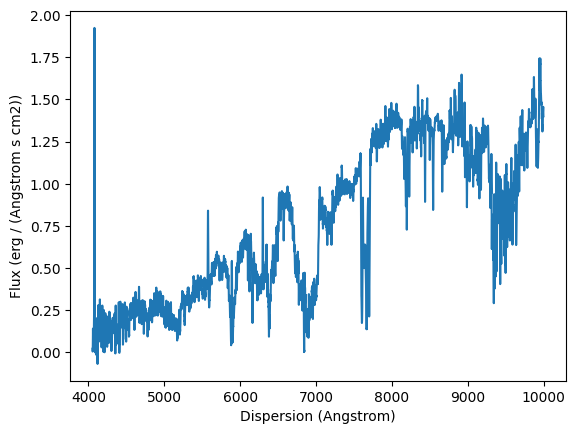

/Users/guanying/SIMPLE_Archive/SIMPLE-db/scripts/spectra_convert/BONES Archive/BONES SPECTRA/BCSpec_1227m0447.txt is plottable



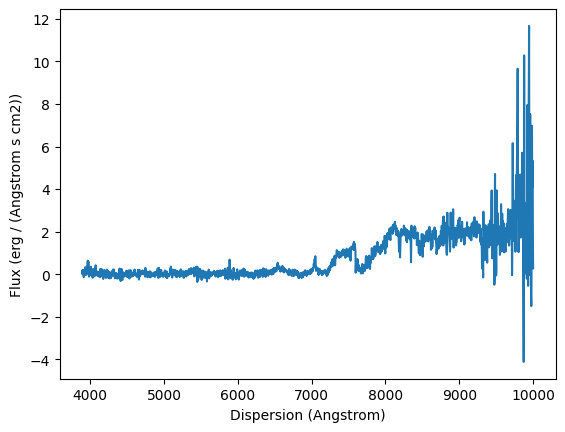

/Users/guanying/SIMPLE_Archive/SIMPLE-db/scripts/spectra_convert/BONES Archive/BONES SPECTRA/BCSpec_1411m4524.txt is plottable



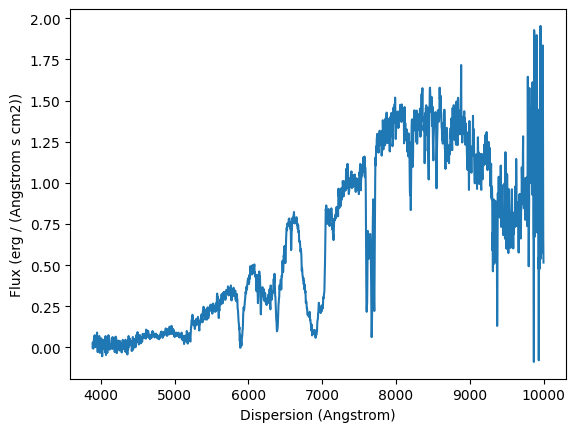

/Users/guanying/SIMPLE_Archive/SIMPLE-db/scripts/spectra_convert/BONES Archive/BONES SPECTRA/BCSpec_1614m8151.txt is plottable



In [8]:
"""  Process source with BCSec spectra: Telescope: LCO-duP
Read the data on two columns:
#1: wavelength      #2: flux
"""
from specutils import Spectrum, SpectralRegion
from specutils.manipulation import extract_region

for file in files:

    data = np.loadtxt(file, comments="#")

    wavelength = data[:, 0] * u.AA
    flux = data[:, 1] * (u.erg / u.cm**2 / u.s / u.AA)

    # Create a spectrum object
    spectrum = Spectrum(flux=flux, spectral_axis=wavelength)
    #print(spectrum.spectral_axis)
    spectrum = extract_region(spectrum, SpectralRegion(0*u.AA, 10000*u.AA))


    # Check if the spectrum is plottable
    if (check_spectrum_plottable(spectrum, show_plot=True)):
        print(f"{file} is plottable\n")
